#üìå Extrac√£o

In [ ]:

import pandas as pd

URL = "https://raw.githubusercontent.com/ajtoriani/Telecom-X/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(URL)

print("Dimens√£o inicial:", df.shape)
df.head()

Dimens√£o inicial: (7267, 6)


customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

#üîß Transforma√ß√£o

In [ ]:
# 1) Ajuste de nomes: tira espa√ßos, lower case e _
df.columns = (df.columns
                .str.strip()
                .str.lower()
                .str.replace(" ", "_")
                .str.replace(r"[^\w_]", "", regex=True))

# 2) Convers√µes comuns (exemplos ‚Äï adapte aos seus nomes reais)
bool_cols = ["phoneservice", "paperlessbilling", "churn"]
for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].map({"Yes": True, "No": False, "Sim": True, "N√£o": False}).astype("boolean")

# 3) Datas/tempos (exemplo gen√©rico)
if "tenure" in df.columns:
    df["tenure_meses"] = df["tenure"].astype(int)

# 4) TotalCharges √†s vezes est√° como string
if "totalcharges" in df.columns:
    df["totalcharges"] = pd.to_numeric(df["totalcharges"], errors="coerce")

# 5) Tratamento de nulos: aqui usamos fillna s√≥ de exemplo; refine se necess√°rio
df = df.fillna({"totalcharges": df["totalcharges"].median()})

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   boolean
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   object 
 5   dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   boolean
 8   multiplelines     7032 non-null   object 
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  contract          7032 non-null   object 
 17  

#üìä Carga e an√°lise

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Configura√ß√µes de visualiza√ß√£o
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')
plt.rcParams['figure.figsize'] = (8, 5)

# Paleta personalizada
def get_palette_color(key):
    palette = {
        'primary_blue': '#0077b6',
        'churn_red': '#d62828',
        'attention_yellow': '#fca311',
        'neutral_gray': '#adb5bd',
        'border_gray': '#dee2e6',
        'dark_text': '#343a40',
        'white_text': '#ffffff',
        'success_green': '#2a9d8f',
        'light_red_degrade': '#ffd6d6'
    }
    return palette.get(key, '#000000')

def generate_degrade_palette(start_color, end_color, n_colors):
    cmap = LinearSegmentedColormap.from_list("custom_degrade", [start_color, end_color])
    return [cmap(x) for x in np.linspace(0, 1, n_colors)]

#üìä Gr√°ficos

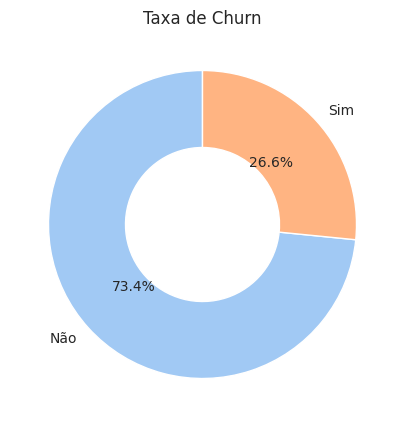

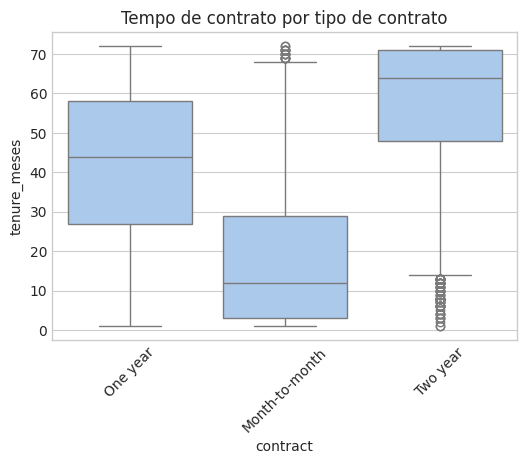

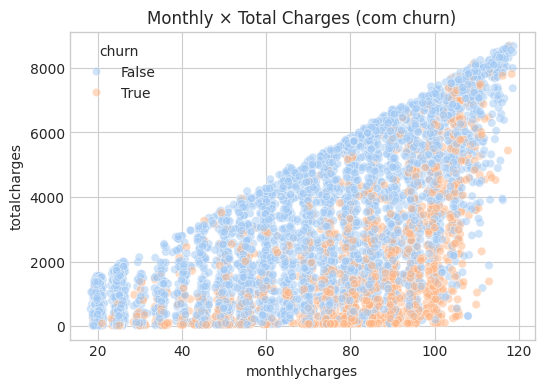

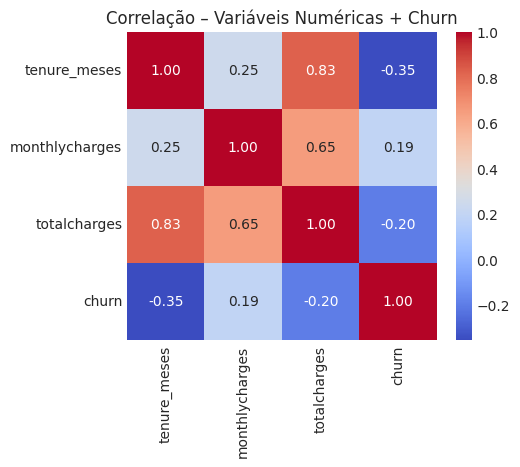

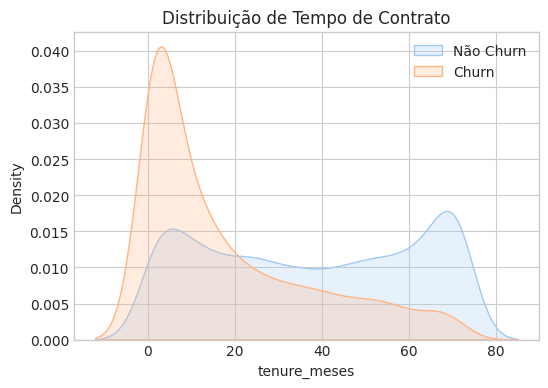

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# 1) Gr√°fico de rosca de churn
plt.figure(figsize=(5,5))
churn_counts = df['churn'].value_counts()
plt.pie(churn_counts, labels=['N√£o', 'Sim'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5))
plt.title("Taxa de Churn")
plt.show()

# 2) Rela√ß√£o Contract x Tenure
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='contract', y='tenure_meses')
plt.title("Tempo de contrato por tipo de contrato")
plt.xticks(rotation=45)
plt.show()

# 3) MonthlyCharges vs. TotalCharges
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='monthlycharges', y='totalcharges', hue='churn', alpha=0.5)
plt.title("Monthly √ó Total Charges (com churn)")
plt.show()

# 4) Heatmap de correla√ß√£o
num_cols = ['tenure_meses', 'monthlycharges', 'totalcharges']
cor = df[num_cols + ['churn']].corr()
plt.figure(figsize=(5,4))
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correla√ß√£o ‚Äì Vari√°veis Num√©ricas + Churn")
plt.show()

# 5) Distribui√ß√£o de tenure com fill=True (atualizado)
plt.figure(figsize=(6,4))
sns.kdeplot(df[df.churn == False].tenure_meses, label='N√£o Churn', fill=True)
sns.kdeplot(df[df.churn == True].tenure_meses, label='Churn', fill=True)
plt.title("Distribui√ß√£o de Tempo de Contrato")
plt.legend()
plt.show()

# üìÑRelat√≥rio Final

## 1. Introdu√ß√£o
Este projeto tem como objetivo entender o comportamento de **evas√£o de clientes (churn)** na empresa fict√≠cia **Telecom X**, utilizando dados p√∫blicos e t√©cnicas de an√°lise explorat√≥ria.

## 2. ETL
- **Extra√ß√£o:** Dados obtidos de um arquivo JSON hospedado no GitHub.
- **Transforma√ß√£o:** Padroniza√ß√£o de colunas, convers√£o de tipos, tratamento de valores ausentes.
- **Carga:** Dados carregados em um DataFrame do Pandas e analisados via Seaborn/Matplotlib.

## 3. An√°lise e Insights
- **Clientes com contratos mensais** apresentam maior churn.
- A maioria dos clientes com churn possui **baixo tempo de empresa (tenure)**.
- **Clientes com cobran√ßas mensais mais altas** t√™m maior taxa de churn.
- Existe uma **correla√ß√£o negativa** entre `tenure` e churn, sugerindo que fideliza√ß√£o √© crucial.

## 4. Recomenda√ß√µes
- Criar programas de reten√ß√£o focados nos **6 primeiros meses** do cliente.
- Oferecer benef√≠cios para migra√ß√£o para contratos anuais ou bianuais.
- Avaliar reestrutura√ß√£o dos pacotes com **altas cobran√ßas mensais**.

## 5. Pr√≥ximos Passos
- Constru√ß√£o de modelos de predi√ß√£o (ex: Random Forest, XGBoost).
- Implementar testes A/B para validar incentivos propostos.
- Monitoramento cont√≠nuo da taxa de churn com dashboards.
